In [1]:
4+9

13

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [3]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [4]:
df_ref = pd.read_excel('D:/THESIS_DATA/ANALYSIS_DATA_THESIS/NN_DATA/NN_train.xlsx')

In [5]:
data=['CPI','DPI','EC','T','WC','1OYSum of kapalı' , '1OYSum of SURE' , '1OYSum of CIRC_TIME' , '1OYSum of WI' , '1OYMax of DEVIR',
      '1OYMax of TEMP' , '1OYSum of ALT_C' , '1OYSum of ÜST_C' , '1OYSum of TEPE_C' , '1OYSum of ZONE_C' , '1OYSum of BEKLEME' ,
      '1OYSum of FAN' , '1OYSum of KAPI ACMA' , '1OYSum of FAN / KLAPE' , '1OYSum of GAUDI_offset' ,
      '1OYSum of GAUDI_nonoffset' , '2AYSum of kapalı' , '2AYSum of SURE' , '2AYSum of CIRC_TIME' , '2AYSum of WI' ,
      '2AYMax of DEVIR' , '2AYMax of TEMP' , '2AYSum of ALT_C' , '2AYSum of ÜST_C' , '2AYSum of TEPE_C' , '2AYSum of ZONE_C' , 
      '2AYSum of BEKLEME' , '2AYSum of FAN' , '2AYSum of KAPI ACMA' , '2AYSum of FAN / KLAPE' , '2AYSum of GAUDI_offset' , 
      '2AYSum of GAUDI_nonoffset' , '3MFTSum of kapalı' , '3MFTSum of SURE' , '3MFTSum of CIRC_TIME' , '3MFTSum of WI' ,
      '3MFTMax of DEVIR' , '3MFTMax of TEMP' , '3MFTSum of ALT_C' , '3MFTSum of ÜST_C' , '3MFTSum of TEPE_C' , 
      '3MFTSum of ZONE_C' , '3MFTSum of BEKLEME' , '3MFTSum of FAN', '3MFTSum of KAPI ACMA' , '3MFTSum of FAN / KLAPE' , 
      '3MFTSum of GAUDI_offset' , '3MFTSum of GAUDI_nonoffset' , '4SGDSum of kapalı' , '4SGDSum of SURE' , 
      '4SGDSum of CIRC_TIME', '4SGDSum of WI' , '4SGDMax of DEVIR' , '4SGDMax of TEMP' , '4SGDSum of ALT_C' , 
      '4SGDSum of ÜST_C' , '4SGDSum of TEPE_C' , '4SGDSum of ZONE_C' , '4SGDSum of BEKLEME' , '4SGDSum of FAN' , 
      '4SGDSum of KAPI ACMA' , '4SGDSum of FAN / KLAPE' , '4SGDSum of GAUDI_offset' , '4SGDSum of GAUDI_nonoffset' , 
      '5ERSum of kapalı' , '5ERSum of SURE' , '5ERSum of CIRC_TIME' , '5ERSum of WI' , '5ERMax of DEVIR' , '5ERMax of TEMP' ,
      '5ERSum of ALT_C' , '5ERSum of ÜST_C' , '5ERSum of TEPE_C' , '5ERSum of ZONE_C' , '5ERSum of BEKLEME' ,
      '5ERSum of FAN' , '5ERSum of KAPI ACMA' , '5ERSum of FAN / KLAPE' , '5ERSum of GAUDI_offset' , 
      '5ERSum of GAUDI_nonoffset' , '6SCD1Sum of kapalı' , '6SCD1Sum of SURE' , '6SCD1Sum of CIRC_TIME' , '6SCD1Sum of WI' , 
      '6SCD1Max of DEVIR' , '6SCD1Max of TEMP' , '6SCD1Sum of ALT_C' , '6SCD1Sum of ÜST_C' , '6SCD1Sum of TEPE_C' , 
      '6SCD1Sum of ZONE_C' , '6SCD1Sum of BEKLEME' , '6SCD1Sum of FAN' , '6SCD1Sum of KAPI ACMA' , '6SCD1Sum of FAN / KLAPE' ,
      '6SCD1Sum of GAUDI_offset' , '6SCD1Sum of GAUDI_nonoffset' , '7SCD2Sum of kapalı' , '7SCD2Sum of SURE' , 
      '7SCD2Sum of CIRC_TIME' , '7SCD2Sum of WI' , '7SCD2Max of DEVIR' , '7SCD2Max of TEMP' , '7SCD2Sum of ALT_C' , 
      '7SCD2Sum of ÜST_C' , '7SCD2Sum of TEPE_C' , '7SCD2Sum of ZONE_C' , '7SCD2Sum of BEKLEME' , '7SCD2Sum of FAN' , 
      '7SCD2Sum of KAPI ACMA' , '7SCD2Sum of FAN / KLAPE' , '7SCD2Sum of GAUDI_offset' , '7SCD2Sum of GAUDI_nonoffset' , 
      '8DSBSum of kapalı' , '8DSBSum of SURE' , '8DSBSum of CIRC_TIME' , '8DSBSum of WI' , '8DSBMax of DEVIR' , 
      '8DSBMax of TEMP' , '8DSBSum of ALT_C' , '8DSBSum of ÜST_C', '8DSBSum of TEPE_C' , '8DSBSum of ZONE_C' ,
      '8DSBSum of BEKLEME' , '8DSBSum of FAN' , '8DSBSum of KAPI ACMA' , '8DSBSum of FAN / KLAPE' , '8DSBSum of GAUDI_offset' ,
      '8DSBSum of GAUDI_nonoffset', '9RYSum of kapalı' , '9RYSum of SURE' , '9RYSum of CIRC_TIME' , '9RYSum of WI' , 
      '9RYMax of DEVIR' , '9RYMax of TEMP' , '9RYSum of ALT_C' , '9RYSum of ÜST_C', '9RYSum of TEPE_C' , '9RYSum of ZONE_C' ,
      '9RYSum of BEKLEME' , '9RYSum of FAN' , '9RYSum of KAPI ACMA' , '9RYSum of FAN / KLAPE' , '9RYSum of GAUDI_offset' ,
      '9RYSum of GAUDI_nonoffset' , '10KUSum of kapalı' , '10KUSum of SURE' , '10KUSum of CIRC_TIME' , '10KUSum of WI' , 
      '10KUMax of DEVIR' , '10KUMax of TEMP' , '10KUSum of ALT_C' , '10KUSum of ÜST_C', '10KUSum of TEPE_C' ,
      '10KUSum of ZONE_C' , '10KUSum of BEKLEME' , '10KUSum of FAN' , '10KUSum of KAPI ACMA' , '10KUSum of FAN / KLAPE' ,
      '10KUSum of GAUDI_offset', '10KUSum of GAUDI_nonoffset']

In [6]:
df=df_ref[data]

In [7]:
indvar=['1OYSum of kapalı' , '1OYSum of SURE' , '1OYSum of CIRC_TIME' , '1OYSum of WI' , '1OYMax of DEVIR',
      '1OYMax of TEMP' , '1OYSum of ALT_C' , '1OYSum of ÜST_C' , '1OYSum of TEPE_C' , '1OYSum of ZONE_C' , '1OYSum of BEKLEME' ,
      '1OYSum of FAN' , '1OYSum of KAPI ACMA' , '1OYSum of FAN / KLAPE' , '1OYSum of GAUDI_offset' ,
      '1OYSum of GAUDI_nonoffset' , '2AYSum of kapalı' , '2AYSum of SURE' , '2AYSum of CIRC_TIME' , '2AYSum of WI' ,
      '2AYMax of DEVIR' , '2AYMax of TEMP' , '2AYSum of ALT_C' , '2AYSum of ÜST_C' , '2AYSum of TEPE_C' , '2AYSum of ZONE_C' , 
      '2AYSum of BEKLEME' , '2AYSum of FAN' , '2AYSum of KAPI ACMA' , '2AYSum of FAN / KLAPE' , '2AYSum of GAUDI_offset' , 
      '2AYSum of GAUDI_nonoffset' , '3MFTSum of kapalı' , '3MFTSum of SURE' , '3MFTSum of CIRC_TIME' , '3MFTSum of WI' ,
      '3MFTMax of DEVIR' , '3MFTMax of TEMP' , '3MFTSum of ALT_C' , '3MFTSum of ÜST_C' , '3MFTSum of TEPE_C' , 
      '3MFTSum of ZONE_C' , '3MFTSum of BEKLEME' , '3MFTSum of FAN', '3MFTSum of KAPI ACMA' , '3MFTSum of FAN / KLAPE' , 
      '3MFTSum of GAUDI_offset' , '3MFTSum of GAUDI_nonoffset' , '4SGDSum of kapalı' , '4SGDSum of SURE' , 
      '4SGDSum of CIRC_TIME', '4SGDSum of WI' , '4SGDMax of DEVIR' , '4SGDMax of TEMP' , '4SGDSum of ALT_C' , 
      '4SGDSum of ÜST_C' , '4SGDSum of TEPE_C' , '4SGDSum of ZONE_C' , '4SGDSum of BEKLEME' , '4SGDSum of FAN' , 
      '4SGDSum of KAPI ACMA' , '4SGDSum of FAN / KLAPE' , '4SGDSum of GAUDI_offset' , '4SGDSum of GAUDI_nonoffset' , 
      '5ERSum of kapalı' , '5ERSum of SURE' , '5ERSum of CIRC_TIME' , '5ERSum of WI' , '5ERMax of DEVIR' , '5ERMax of TEMP' ,
      '5ERSum of ALT_C' , '5ERSum of ÜST_C' , '5ERSum of TEPE_C' , '5ERSum of ZONE_C' , '5ERSum of BEKLEME' ,
      '5ERSum of FAN' , '5ERSum of KAPI ACMA' , '5ERSum of FAN / KLAPE' , '5ERSum of GAUDI_offset' , 
      '5ERSum of GAUDI_nonoffset' , '6SCD1Sum of kapalı' , '6SCD1Sum of SURE' , '6SCD1Sum of CIRC_TIME' , '6SCD1Sum of WI' , 
      '6SCD1Max of DEVIR' , '6SCD1Max of TEMP' , '6SCD1Sum of ALT_C' , '6SCD1Sum of ÜST_C' , '6SCD1Sum of TEPE_C' , 
      '6SCD1Sum of ZONE_C' , '6SCD1Sum of BEKLEME' , '6SCD1Sum of FAN' , '6SCD1Sum of KAPI ACMA' , '6SCD1Sum of FAN / KLAPE' ,
      '6SCD1Sum of GAUDI_offset' , '6SCD1Sum of GAUDI_nonoffset' , '7SCD2Sum of kapalı' , '7SCD2Sum of SURE' , 
      '7SCD2Sum of CIRC_TIME' , '7SCD2Sum of WI' , '7SCD2Max of DEVIR' , '7SCD2Max of TEMP' , '7SCD2Sum of ALT_C' , 
      '7SCD2Sum of ÜST_C' , '7SCD2Sum of TEPE_C' , '7SCD2Sum of ZONE_C' , '7SCD2Sum of BEKLEME' , '7SCD2Sum of FAN' , 
      '7SCD2Sum of KAPI ACMA' , '7SCD2Sum of FAN / KLAPE' , '7SCD2Sum of GAUDI_offset' , '7SCD2Sum of GAUDI_nonoffset' , 
      '8DSBSum of kapalı' , '8DSBSum of SURE' , '8DSBSum of CIRC_TIME' , '8DSBSum of WI' , '8DSBMax of DEVIR' , 
      '8DSBMax of TEMP' , '8DSBSum of ALT_C' , '8DSBSum of ÜST_C', '8DSBSum of TEPE_C' , '8DSBSum of ZONE_C' ,
      '8DSBSum of BEKLEME' , '8DSBSum of FAN' , '8DSBSum of KAPI ACMA' , '8DSBSum of FAN / KLAPE' , '8DSBSum of GAUDI_offset' ,
      '8DSBSum of GAUDI_nonoffset', '9RYSum of kapalı' , '9RYSum of SURE' , '9RYSum of CIRC_TIME' , '9RYSum of WI' , 
      '9RYMax of DEVIR' , '9RYMax of TEMP' , '9RYSum of ALT_C' , '9RYSum of ÜST_C', '9RYSum of TEPE_C' , '9RYSum of ZONE_C' ,
      '9RYSum of BEKLEME' , '9RYSum of FAN' , '9RYSum of KAPI ACMA' , '9RYSum of FAN / KLAPE' , '9RYSum of GAUDI_offset' ,
      '9RYSum of GAUDI_nonoffset' , '10KUSum of kapalı' , '10KUSum of SURE' , '10KUSum of CIRC_TIME' , '10KUSum of WI' , 
      '10KUMax of DEVIR' , '10KUMax of TEMP' , '10KUSum of ALT_C' , '10KUSum of ÜST_C', '10KUSum of TEPE_C' ,
      '10KUSum of ZONE_C' , '10KUSum of BEKLEME' , '10KUSum of FAN' , '10KUSum of KAPI ACMA' , '10KUSum of FAN / KLAPE' ,
      '10KUSum of GAUDI_offset', '10KUSum of GAUDI_nonoffset']

In [8]:
df=df.drop_duplicates(keep='last',subset=indvar)

In [9]:
y_CPI = df['CPI']
y_DPI = df['DPI']
y_EC_D=df['EC']
y_T_D=df['T']
y_WC=df['WC']

In [10]:
df

,CPI,DPI,EC,T,WC,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,...,10KUSum of ALT_C,10KUSum of ÜST_C,10KUSum of TEPE_C,10KUSum of ZONE_C,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset,10KUSum of GAUDI_nonoffset
1,2.300000,15.000000,0.67000,30.0,11.800000,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.320000,15.000000,0.71000,30.0,10.400000,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.320000,15.000000,0.64000,30.0,10.800000,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.320000,15.000000,0.67000,30.0,11.800000,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
6,2.320000,15.000000,0.64000,30.0,10.800000,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,3.420000,84.000000,0.72775,252.0,9.500000,6,54,41,4.0,2800,...,0,0,0,0,80,0,1,0,0,0
141,3.430000,87.113333,0.79400,222.5,9.390000,0,21,18,4.0,3000,...,0,0,0,0,10,83,1,0,0,0
142,3.430000,65.000000,1.11000,58.0,10.000000,0,0,0,0.0,0,...,0,0,0,0,15,0,0,0,0,0
143,3.445000,86.666667,0.79800,243.0,7.286667,0,23,17,4.0,3000,...,0,0,0,0,10,93,0,32,0,0


In [11]:
df=df[indvar]

In [12]:
y=y_CPI

In [13]:
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.1) #Removing both constant and quasi-constant
var_thr.fit(df)

var_thr.get_support()
concol = [column for column in df.columns 
          if column not in df.columns[var_thr.get_support()]]
df_ver_1=df.drop(concol,axis=1)
df_ver_1.columns

Index(['1OYSum of kapalı', '1OYSum of SURE', '1OYSum of CIRC_TIME',
       '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP', '1OYSum of ALT_C',
       '1OYSum of ÜST_C', '1OYSum of TEPE_C', '1OYSum of BEKLEME',
       '2AYSum of kapalı', '2AYSum of SURE', '2AYSum of CIRC_TIME',
       '2AYSum of WI', '2AYMax of DEVIR', '2AYMax of TEMP', '2AYSum of ALT_C',
       '2AYSum of ÜST_C', '2AYSum of TEPE_C', '3MFTSum of SURE',
       '3MFTSum of WI', '4SGDSum of SURE', '4SGDSum of CIRC_TIME',
       '4SGDSum of WI', '4SGDMax of DEVIR', '4SGDSum of ALT_C',
       '4SGDSum of ÜST_C', '4SGDSum of TEPE_C', '4SGDSum of BEKLEME',
       '7SCD2Sum of kapalı', '7SCD2Sum of SURE', '7SCD2Sum of CIRC_TIME',
       '7SCD2Sum of WI', '7SCD2Max of DEVIR', '7SCD2Max of TEMP',
       '7SCD2Sum of ALT_C', '7SCD2Sum of ÜST_C', '7SCD2Sum of TEPE_C',
       '7SCD2Sum of BEKLEME', '8DSBSum of kapalı', '8DSBSum of SURE',
       '8DSBSum of CIRC_TIME', '8DSBMax of DEVIR', '10KUSum of SURE',
       '10KUSum of BEK

In [14]:
df_ver_2=df_ver_1

In [15]:
correlation_matrix=df_ver_2.corr()
correlated_features = set()

In [16]:
threshold = 0.90

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [17]:
df_ver_3 = df_ver_2.drop(labels=correlated_features, axis=1)
df_ver_3

,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,1OYMax of TEMP,1OYSum of ALT_C,1OYSum of BEKLEME,2AYSum of kapalı,2AYSum of SURE,...,7SCD2Sum of ÜST_C,7SCD2Sum of TEPE_C,8DSBSum of kapalı,8DSBMax of DEVIR,10KUSum of SURE,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset
1,0,0,0,0.0,0,0,0.0,0,0,12,...,7.0,0.0,0,0,1,0,0,0,0,0
2,0,0,0,0.0,0,0,0.0,0,0,14,...,7.0,0.0,0,0,1,0,0,0,0,0
3,0,0,0,0.0,0,0,0.0,0,0,15,...,2.4,0.2,0,0,0,0,0,0,0,0
5,0,0,0,0.0,0,0,0.0,0,0,14,...,7.0,0.0,0,0,0,0,0,0,0,0
6,0,0,0,0.0,0,0,0.0,0,0,15,...,2.4,0.2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,6,54,41,4.0,2800,54,11.0,10,0,69,...,13.0,6.0,0,0,82,80,0,1,0,0
141,0,21,18,4.0,3000,0,7.0,0,0,75,...,7.0,9.0,0,0,95,10,83,1,0,0
142,0,0,0,0.0,0,0,0.0,0,0,22,...,13.0,0.0,0,0,16,15,0,0,0,0
143,0,23,17,4.0,3000,0,7.0,2,0,74,...,8.2,3.6,3,2800,104,10,93,0,32,0


In [18]:
X=df_ver_3

In [19]:
X

,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,1OYMax of TEMP,1OYSum of ALT_C,1OYSum of BEKLEME,2AYSum of kapalı,2AYSum of SURE,...,7SCD2Sum of ÜST_C,7SCD2Sum of TEPE_C,8DSBSum of kapalı,8DSBMax of DEVIR,10KUSum of SURE,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset
1,0,0,0,0.0,0,0,0.0,0,0,12,...,7.0,0.0,0,0,1,0,0,0,0,0
2,0,0,0,0.0,0,0,0.0,0,0,14,...,7.0,0.0,0,0,1,0,0,0,0,0
3,0,0,0,0.0,0,0,0.0,0,0,15,...,2.4,0.2,0,0,0,0,0,0,0,0
5,0,0,0,0.0,0,0,0.0,0,0,14,...,7.0,0.0,0,0,0,0,0,0,0,0
6,0,0,0,0.0,0,0,0.0,0,0,15,...,2.4,0.2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,6,54,41,4.0,2800,54,11.0,10,0,69,...,13.0,6.0,0,0,82,80,0,1,0,0
141,0,21,18,4.0,3000,0,7.0,0,0,75,...,7.0,9.0,0,0,95,10,83,1,0,0
142,0,0,0,0.0,0,0,0.0,0,0,22,...,13.0,0.0,0,0,16,15,0,0,0,0
143,0,23,17,4.0,3000,0,7.0,2,0,74,...,8.2,3.6,3,2800,104,10,93,0,32,0


In [20]:
y

1      2.300000
2      2.320000
3      2.320000
5      2.320000
6      2.320000
         ...   
139    3.420000
141    3.430000
142    3.430000
143    3.445000
144    3.454335
Name: CPI, Length: 87, dtype: float64

In [21]:
X.columns

Index(['1OYSum of kapalı', '1OYSum of SURE', '1OYSum of CIRC_TIME',
       '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP', '1OYSum of ALT_C',
       '1OYSum of BEKLEME', '2AYSum of kapalı', '2AYSum of SURE',
       '2AYSum of WI', '2AYMax of DEVIR', '2AYMax of TEMP', '2AYSum of ALT_C',
       '2AYSum of TEPE_C', '3MFTSum of SURE', '4SGDSum of SURE',
       '4SGDSum of WI', '4SGDMax of DEVIR', '4SGDSum of ALT_C',
       '4SGDSum of ÜST_C', '4SGDSum of TEPE_C', '7SCD2Sum of kapalı',
       '7SCD2Sum of SURE', '7SCD2Max of DEVIR', '7SCD2Max of TEMP',
       '7SCD2Sum of ALT_C', '7SCD2Sum of ÜST_C', '7SCD2Sum of TEPE_C',
       '8DSBSum of kapalı', '8DSBMax of DEVIR', '10KUSum of SURE',
       '10KUSum of BEKLEME', '10KUSum of FAN', '10KUSum of KAPI ACMA',
       '10KUSum of FAN / KLAPE', '10KUSum of GAUDI_offset'],
      dtype='object')

In [22]:
NN=['1OYSum of kapalı', '1OYSum of SURE', '1OYSum of CIRC_TIME',
       '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP', '1OYSum of ALT_C',
       '1OYSum of BEKLEME', '2AYSum of kapalı', '2AYSum of SURE',
       '2AYSum of WI', '2AYMax of DEVIR', '2AYMax of TEMP', '2AYSum of ALT_C',
       '2AYSum of TEPE_C', '3MFTSum of SURE', '4SGDSum of SURE',
       '4SGDSum of WI', '4SGDMax of DEVIR', '4SGDSum of ALT_C',
       '4SGDSum of ÜST_C', '4SGDSum of TEPE_C', '7SCD2Sum of kapalı',
       '7SCD2Sum of SURE', '7SCD2Max of DEVIR', '7SCD2Max of TEMP',
       '7SCD2Sum of ALT_C', '7SCD2Sum of ÜST_C', '7SCD2Sum of TEPE_C',
       '8DSBSum of kapalı', '8DSBMax of DEVIR', '10KUSum of SURE',
       '10KUSum of BEKLEME', '10KUSum of FAN', '10KUSum of KAPI ACMA',
       '10KUSum of FAN / KLAPE', '10KUSum of GAUDI_offset']

In [ ]:
#from keras.optimizers import SGD
#epochs=1000
#learning_rate = 0.1
#decay_rate = learning_rate / epochs
#momentum = 0.8

#sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

#NN_model.compile(loss='mean_squared_error',
              #optimizer=sgd,
              #metrics=['mean_squared_error'])

In [23]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
import tensorflow as tf

adam=tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')
NN_model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_squared_error'])

NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4864      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 169,729
Trainable params: 169,729
Non-trainable params: 0
_________________________________________________________________


In [24]:
checkpoint_name = 'Weights-{epoch:03d}--{mean_squared_error:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='mean_squared_error', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [25]:
NN_model.fit(X, y, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/1000
1/3 [=========>....................] - ETA: 2s - loss: 92.6803 - mean_squared_error: 92.6803
Epoch 1: mean_squared_error improved from inf to 1614.48010, saving model to Weights-001--1614.48010.hdf5
3/3 [==============================] - 2s 420ms/step - loss: 1614.4801 - mean_squared_error: 1614.4801 - val_loss: 102.3906 - val_mean_squared_error: 102.3906
Epoch 2/1000
1/3 [=========>....................] - ETA: 0s - loss: 99.6420 - mean_squared_error: 99.6420
Epoch 2: mean_squared_error improved from 1614.48010 to 289.58261, saving model to Weights-002--289.58261.hdf5
3/3 [==============================] - 0s 82ms/step - loss: 289.5826 - mean_squared_error: 289.5826 - val_loss: 126.0793 - val_mean_squared_error: 126.0793
Epoch 3/1000
1/3 [=========>....................] - ETA: 0s - loss: 129.7063 - mean_squared_error: 129.7063
Epoch 3: mean_squared_error improved from 289.58261 to 69.13137, saving model to Weights-003--69.13137.hdf5
3/3 [==============================] - 0

1/3 [=========>....................] - ETA: 0s - loss: 0.0481 - mean_squared_error: 0.0481
Epoch 25: mean_squared_error improved from 0.07201 to 0.07093, saving model to Weights-025--0.07093.hdf5
3/3 [==============================] - 0s 92ms/step - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.0532 - val_mean_squared_error: 0.0532
Epoch 26/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0944 - mean_squared_error: 0.0944
Epoch 26: mean_squared_error did not improve from 0.07093
3/3 [==============================] - 0s 46ms/step - loss: 0.0786 - mean_squared_error: 0.0786 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 27/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0832 - mean_squared_error: 0.0832
Epoch 27: mean_squared_error did not improve from 0.07093
3/3 [==============================] - 0s 46ms/step - loss: 0.0732 - mean_squared_error: 0.0732 - val_loss: 0.0562 - val_mean_squared_error: 0.0562
Epoch 28/1000
1/3 [=========>.....

1/3 [=========>....................] - ETA: 0s - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 50: mean_squared_error improved from 0.04535 to 0.04437, saving model to Weights-050--0.04437.hdf5
3/3 [==============================] - 0s 77ms/step - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 51/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 51: mean_squared_error improved from 0.04437 to 0.03948, saving model to Weights-051--0.03948.hdf5
3/3 [==============================] - 0s 87ms/step - loss: 0.0395 - mean_squared_error: 0.0395 - val_loss: 0.0774 - val_mean_squared_error: 0.0774
Epoch 52/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 52: mean_squared_error did not improve from 0.03948
3/3 [==============================] - 0s 47ms/step - loss: 0.0523 - mean_squared_error: 0.0523 - val_loss: 0.0378 - val_mean_squared_e

1/3 [=========>....................] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 75: mean_squared_error did not improve from 0.02984
3/3 [==============================] - 0s 46ms/step - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 76/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 76: mean_squared_error did not improve from 0.02984
3/3 [==============================] - 0s 46ms/step - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.0365 - val_mean_squared_error: 0.0365
Epoch 77/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0544 - mean_squared_error: 0.0544
Epoch 77: mean_squared_error improved from 0.02984 to 0.02896, saving model to Weights-077--0.02896.hdf5
3/3 [==============================] - 0s 92ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 78/1000
1/3 [=========>.....

1/3 [=========>....................] - ETA: 0s - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 101: mean_squared_error did not improve from 0.02810
3/3 [==============================] - 0s 49ms/step - loss: 0.0564 - mean_squared_error: 0.0564 - val_loss: 0.1672 - val_mean_squared_error: 0.1672
Epoch 102/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0864 - mean_squared_error: 0.0864
Epoch 102: mean_squared_error did not improve from 0.02810
3/3 [==============================] - 0s 47ms/step - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 103/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 103: mean_squared_error improved from 0.02810 to 0.02580, saving model to Weights-103--0.02580.hdf5
3/3 [==============================] - 0s 90ms/step - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0898 - val_mean_squared_error: 0.0898
Epoch 104/1000
1/3 [=========

Epoch 126/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 126: mean_squared_error did not improve from 0.02011
3/3 [==============================] - 0s 45ms/step - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0535 - val_mean_squared_error: 0.0535
Epoch 127/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 127: mean_squared_error did not improve from 0.02011
3/3 [==============================] - 0s 44ms/step - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0906 - val_mean_squared_error: 0.0906
Epoch 128/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 128: mean_squared_error did not improve from 0.02011
3/3 [==============================] - 0s 43ms/step - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0213 - val_mean_squared_error: 0.0213
Epoch 129/1000
1/3 [=========>....................] - ETA: 0s

Epoch 152/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 152: mean_squared_error did not improve from 0.01358
3/3 [==============================] - 0s 49ms/step - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0691 - val_mean_squared_error: 0.0691
Epoch 153/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 153: mean_squared_error improved from 0.01358 to 0.01166, saving model to Weights-153--0.01166.hdf5
3/3 [==============================] - 0s 80ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.1067 - val_mean_squared_error: 0.1067
Epoch 154/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 154: mean_squared_error did not improve from 0.01166
3/3 [==============================] - 0s 44ms/step - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0716 - val_mean_squared_error: 0.0716
Epoch 155/1000

1/3 [=========>....................] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 178: mean_squared_error did not improve from 0.01166
3/3 [==============================] - 0s 36ms/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0731 - val_mean_squared_error: 0.0731
Epoch 179/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 179: mean_squared_error did not improve from 0.01166
3/3 [==============================] - 0s 40ms/step - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.1177 - val_mean_squared_error: 0.1177
Epoch 180/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 180: mean_squared_error did not improve from 0.01166
3/3 [==============================] - 0s 41ms/step - loss: 0.0672 - mean_squared_error: 0.0672 - val_loss: 0.1395 - val_mean_squared_error: 0.1395
Epoch 181/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0394

1/3 [=========>....................] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 204: mean_squared_error did not improve from 0.01126
3/3 [==============================] - 0s 44ms/step - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.1187 - val_mean_squared_error: 0.1187
Epoch 205/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 205: mean_squared_error did not improve from 0.01126
3/3 [==============================] - 0s 47ms/step - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.1545 - val_mean_squared_error: 0.1545
Epoch 206/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 206: mean_squared_error did not improve from 0.01126
3/3 [==============================] - 0s 44ms/step - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 207/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0179

Epoch 230/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 230: mean_squared_error did not improve from 0.00767
3/3 [==============================] - 0s 44ms/step - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.1954 - val_mean_squared_error: 0.1954
Epoch 231/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 231: mean_squared_error did not improve from 0.00767
3/3 [==============================] - 0s 51ms/step - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.0785 - val_mean_squared_error: 0.0785
Epoch 232/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0048 - mean_squared_error: 0.0048
Epoch 232: mean_squared_error did not improve from 0.00767
3/3 [==============================] - 0s 50ms/step - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0767 - val_mean_squared_error: 0.0767
Epoch 233/1000
1/3 [=========>....................] - ETA: 0s

1/3 [=========>....................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 256: mean_squared_error did not improve from 0.00649
3/3 [==============================] - 0s 42ms/step - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.1172 - val_mean_squared_error: 0.1172
Epoch 257/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 257: mean_squared_error did not improve from 0.00649
3/3 [==============================] - 0s 41ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.1415 - val_mean_squared_error: 0.1415
Epoch 258/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 258: mean_squared_error did not improve from 0.00649
3/3 [==============================] - 0s 40ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.1044 - val_mean_squared_error: 0.1044
Epoch 259/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0303

1/3 [=========>....................] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 282: mean_squared_error did not improve from 0.00649
3/3 [==============================] - 0s 40ms/step - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 283/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0271 - mean_squared_error: 0.0271
Epoch 283: mean_squared_error did not improve from 0.00649
3/3 [==============================] - 0s 45ms/step - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.1206 - val_mean_squared_error: 0.1206
Epoch 284/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 284: mean_squared_error did not improve from 0.00649
3/3 [==============================] - 0s 42ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.1302 - val_mean_squared_error: 0.1302
Epoch 285/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0067

1/3 [=========>....................] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 308: mean_squared_error did not improve from 0.00649
3/3 [==============================] - 0s 46ms/step - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.1522 - val_mean_squared_error: 0.1522
Epoch 309/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 309: mean_squared_error did not improve from 0.00649
3/3 [==============================] - 0s 41ms/step - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.1042 - val_mean_squared_error: 0.1042
Epoch 310/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 310: mean_squared_error did not improve from 0.00649
3/3 [==============================] - 0s 44ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0965 - val_mean_squared_error: 0.0965
Epoch 311/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0140

Epoch 334/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.1065 - mean_squared_error: 0.1065
Epoch 334: mean_squared_error did not improve from 0.00411
3/3 [==============================] - 0s 46ms/step - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.1031 - val_mean_squared_error: 0.1031
Epoch 335/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 335: mean_squared_error did not improve from 0.00411
3/3 [==============================] - 0s 40ms/step - loss: 0.0551 - mean_squared_error: 0.0551 - val_loss: 0.1816 - val_mean_squared_error: 0.1816
Epoch 336/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 336: mean_squared_error did not improve from 0.00411
3/3 [==============================] - 0s 48ms/step - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.1641 - val_mean_squared_error: 0.1641
Epoch 337/1000
1/3 [=========>....................] - ETA: 0s

1/3 [=========>....................] - ETA: 0s - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 360: mean_squared_error did not improve from 0.00408
3/3 [==============================] - 0s 46ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.1056 - val_mean_squared_error: 0.1056
Epoch 361/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 361: mean_squared_error did not improve from 0.00408
3/3 [==============================] - 0s 45ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0843 - val_mean_squared_error: 0.0843
Epoch 362/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 362: mean_squared_error did not improve from 0.00408
3/3 [==============================] - 0s 50ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.1230 - val_mean_squared_error: 0.1230
Epoch 363/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0037

Epoch 386/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 386: mean_squared_error did not improve from 0.00299
3/3 [==============================] - 0s 46ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.1348 - val_mean_squared_error: 0.1348
Epoch 387/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 387: mean_squared_error did not improve from 0.00299
3/3 [==============================] - 0s 46ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.1218 - val_mean_squared_error: 0.1218
Epoch 388/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 388: mean_squared_error did not improve from 0.00299
3/3 [==============================] - 0s 48ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0871 - val_mean_squared_error: 0.0871
Epoch 389/1000
1/3 [=========>....................] - ETA: 0s

1/3 [=========>....................] - ETA: 0s - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 412: mean_squared_error did not improve from 0.00251
3/3 [==============================] - 0s 41ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.1524 - val_mean_squared_error: 0.1524
Epoch 413/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 413: mean_squared_error did not improve from 0.00251
3/3 [==============================] - 0s 42ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.1230 - val_mean_squared_error: 0.1230
Epoch 414/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 414: mean_squared_error did not improve from 0.00251
3/3 [==============================] - 0s 39ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0866 - val_mean_squared_error: 0.0866
Epoch 415/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0101

1/3 [=========>....................] - ETA: 0s - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 438: mean_squared_error did not improve from 0.00251
3/3 [==============================] - 0s 41ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.1133 - val_mean_squared_error: 0.1133
Epoch 439/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 439: mean_squared_error did not improve from 0.00251
3/3 [==============================] - 0s 39ms/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0911 - val_mean_squared_error: 0.0911
Epoch 440/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 440: mean_squared_error did not improve from 0.00251
3/3 [==============================] - 0s 38ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.1671 - val_mean_squared_error: 0.1671
Epoch 441/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0150

1/3 [=========>....................] - ETA: 0s - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 464: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 40ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0913 - val_mean_squared_error: 0.0913
Epoch 465/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 465: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 39ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.1005 - val_mean_squared_error: 0.1005
Epoch 466/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 466: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 44ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.1450 - val_mean_squared_error: 0.1450
Epoch 467/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0074

1/3 [=========>....................] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 490: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 43ms/step - loss: 0.0559 - mean_squared_error: 0.0559 - val_loss: 0.1888 - val_mean_squared_error: 0.1888
Epoch 491/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 491: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 49ms/step - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.1637 - val_mean_squared_error: 0.1637
Epoch 492/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 492: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 48ms/step - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.1099 - val_mean_squared_error: 0.1099
Epoch 493/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0044

1/3 [=========>....................] - ETA: 0s - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 516: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 43ms/step - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.3511 - val_mean_squared_error: 0.3511
Epoch 517/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0800 - mean_squared_error: 0.0800
Epoch 517: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 50ms/step - loss: 0.0571 - mean_squared_error: 0.0571 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 518/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0807 - mean_squared_error: 0.0807
Epoch 518: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 47ms/step - loss: 0.0976 - mean_squared_error: 0.0976 - val_loss: 0.1755 - val_mean_squared_error: 0.1755
Epoch 519/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0928

1/3 [=========>....................] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 542: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 47ms/step - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.1188 - val_mean_squared_error: 0.1188
Epoch 543/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 543: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 47ms/step - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1112 - val_mean_squared_error: 0.1112
Epoch 544/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0331 - mean_squared_error: 0.0331
Epoch 544: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 46ms/step - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0542 - val_mean_squared_error: 0.0542
Epoch 545/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0317

1/3 [=========>....................] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 568: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 45ms/step - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.1137 - val_mean_squared_error: 0.1137
Epoch 569/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 569: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 47ms/step - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.1031 - val_mean_squared_error: 0.1031
Epoch 570/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0741 - mean_squared_error: 0.0741
Epoch 570: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 46ms/step - loss: 0.0517 - mean_squared_error: 0.0517 - val_loss: 0.1213 - val_mean_squared_error: 0.1213
Epoch 571/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0222

1/3 [=========>....................] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 594: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 43ms/step - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0937 - val_mean_squared_error: 0.0937
Epoch 595/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 595: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 42ms/step - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.1353 - val_mean_squared_error: 0.1353
Epoch 596/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 596: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 41ms/step - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1560 - val_mean_squared_error: 0.1560
Epoch 597/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0444

1/3 [=========>....................] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 620: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 52ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.1109 - val_mean_squared_error: 0.1109
Epoch 621/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 621: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 44ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.1932 - val_mean_squared_error: 0.1932
Epoch 622/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 622: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 43ms/step - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0869 - val_mean_squared_error: 0.0869
Epoch 623/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0389

1/3 [=========>....................] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 646: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 44ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.1063 - val_mean_squared_error: 0.1063
Epoch 647/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0046 - mean_squared_error: 0.0046
Epoch 647: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 45ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0806 - val_mean_squared_error: 0.0806
Epoch 648/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 648: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 43ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.1725 - val_mean_squared_error: 0.1725
Epoch 649/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0114

1/3 [=========>....................] - ETA: 0s - loss: 0.0716 - mean_squared_error: 0.0716
Epoch 672: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 44ms/step - loss: 0.0437 - mean_squared_error: 0.0437 - val_loss: 0.2700 - val_mean_squared_error: 0.2700
Epoch 673/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0577 - mean_squared_error: 0.0577
Epoch 673: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 41ms/step - loss: 0.0471 - mean_squared_error: 0.0471 - val_loss: 0.0846 - val_mean_squared_error: 0.0846
Epoch 674/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 674: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 44ms/step - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.1157 - val_mean_squared_error: 0.1157
Epoch 675/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0385

1/3 [=========>....................] - ETA: 0s - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 698: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 40ms/step - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.1017 - val_mean_squared_error: 0.1017
Epoch 699/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 699: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 41ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.1515 - val_mean_squared_error: 0.1515
Epoch 700/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0054 - mean_squared_error: 0.0054
Epoch 700: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 42ms/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0990 - val_mean_squared_error: 0.0990
Epoch 701/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0063

1/3 [=========>....................] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 724: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 44ms/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0871 - val_mean_squared_error: 0.0871
Epoch 725/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 725: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 41ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.1525 - val_mean_squared_error: 0.1525
Epoch 726/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 726: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 43ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.1063 - val_mean_squared_error: 0.1063
Epoch 727/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0034

1/3 [=========>....................] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 750: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 45ms/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.1339 - val_mean_squared_error: 0.1339
Epoch 751/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 751: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 40ms/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.1296 - val_mean_squared_error: 0.1296
Epoch 752/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 752: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 43ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.1346 - val_mean_squared_error: 0.1346
Epoch 753/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0076

1/3 [=========>....................] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 776: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 45ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0882 - val_mean_squared_error: 0.0882
Epoch 777/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 777: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 53ms/step - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.1201 - val_mean_squared_error: 0.1201
Epoch 778/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 778: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 44ms/step - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.1716 - val_mean_squared_error: 0.1716
Epoch 779/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0215

1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 802: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 46ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.1718 - val_mean_squared_error: 0.1718
Epoch 803/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 803: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 47ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.1471 - val_mean_squared_error: 0.1471
Epoch 804/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0054 - mean_squared_error: 0.0054
Epoch 804: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 51ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.1233 - val_mean_squared_error: 0.1233
Epoch 805/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0052

1/3 [=========>....................] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 828: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 47ms/step - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.1170 - val_mean_squared_error: 0.1170
Epoch 829/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 829: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 43ms/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.2435 - val_mean_squared_error: 0.2435
Epoch 830/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 830: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 51ms/step - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0860 - val_mean_squared_error: 0.0860
Epoch 831/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0258

1/3 [=========>....................] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 854: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 46ms/step - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0888 - val_mean_squared_error: 0.0888
Epoch 855/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 855: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 47ms/step - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0700 - val_mean_squared_error: 0.0700
Epoch 856/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 856: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 44ms/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.1250 - val_mean_squared_error: 0.1250
Epoch 857/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0027

1/3 [=========>....................] - ETA: 0s - loss: 0.0040 - mean_squared_error: 0.0040
Epoch 880: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 40ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.1248 - val_mean_squared_error: 0.1248
Epoch 881/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 881: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 41ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.1088 - val_mean_squared_error: 0.1088
Epoch 882/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 882: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 42ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.1185 - val_mean_squared_error: 0.1185
Epoch 883/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0052

1/3 [=========>....................] - ETA: 0s - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 906: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 48ms/step - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 907/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 907: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 46ms/step - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.1685 - val_mean_squared_error: 0.1685
Epoch 908/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0427 - mean_squared_error: 0.0427
Epoch 908: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 51ms/step - loss: 0.0450 - mean_squared_error: 0.0450 - val_loss: 0.0384 - val_mean_squared_error: 0.0384
Epoch 909/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0444

1/3 [=========>....................] - ETA: 0s - loss: 0.0783 - mean_squared_error: 0.0783
Epoch 932: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 56ms/step - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.1414 - val_mean_squared_error: 0.1414
Epoch 933/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 933: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 56ms/step - loss: 0.0536 - mean_squared_error: 0.0536 - val_loss: 0.1857 - val_mean_squared_error: 0.1857
Epoch 934/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0550 - mean_squared_error: 0.0550
Epoch 934: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 51ms/step - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.1159 - val_mean_squared_error: 0.1159
Epoch 935/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0399

1/3 [=========>....................] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 958: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 44ms/step - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0722 - val_mean_squared_error: 0.0722
Epoch 959/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 959: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 45ms/step - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.1973 - val_mean_squared_error: 0.1973
Epoch 960/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0396 - mean_squared_error: 0.0396
Epoch 960: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 50ms/step - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0686 - val_mean_squared_error: 0.0686
Epoch 961/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0318

1/3 [=========>....................] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 984: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 42ms/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0868 - val_mean_squared_error: 0.0868
Epoch 985/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 985: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 45ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.1021 - val_mean_squared_error: 0.1021
Epoch 986/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 986: mean_squared_error did not improve from 0.00192
3/3 [==============================] - 0s 57ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.1641 - val_mean_squared_error: 0.1641
Epoch 987/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.0137

In [49]:
# Load wights file of the best model :
wights_file = 'Weights-454--0.00192.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [50]:
df_test = pd.read_excel('D:/THESIS_DATA/ANALYSIS_DATA_THESIS/NN_DATA/NN_test.xlsx')

In [51]:
X_test=df_test[NN]

In [52]:
predictions = NN_model.predict(X_test)
predictions=pd.DataFrame(predictions)

1/1 [==============================] - 0s 124ms/step


In [53]:
df_test['outputCPI_NN']=predictions

Result (Test)
MAE : 0.17335


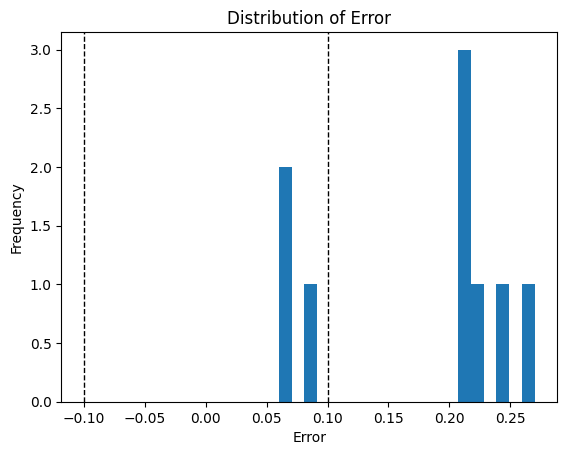

In [54]:
y_pred= predictions
df_test['output']=y_pred
from sklearn.metrics import mean_absolute_error as MAE
output=df_test['output']
variable=df_test['CPI']
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
import matplotlib.pyplot as plt
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(-0.1, color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(learning_rate= 0.1, max_depth= 10, min_samples_leaf= 5,
                                        min_samples_split= 10, n_estimators= 150)
model.fit(X, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 0.052 59.845


In [56]:
predictions = model.predict(X_test)
predictions=pd.DataFrame(predictions)
df_test['outputCPI_GBR']=predictions

Result (Test)
MAE : 0.20562


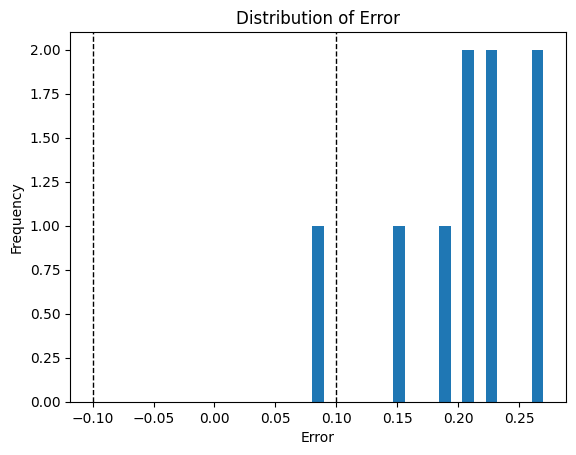

In [57]:
y_pred= predictions
df_test['output']=y_pred
from sklearn.metrics import mean_absolute_error as MAE
output=df_test['output']
variable=df_test['CPI']
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
import matplotlib.pyplot as plt
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(-0.1, color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

In [61]:
from xgboost import XGBRegressor
model=XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 0.042 74.093


In [62]:
predictions = model.predict(X_test)
predictions=pd.DataFrame(predictions)
df_test['outputCPI_XGB']=predictions

Result (Test)
MAE : 0.21734


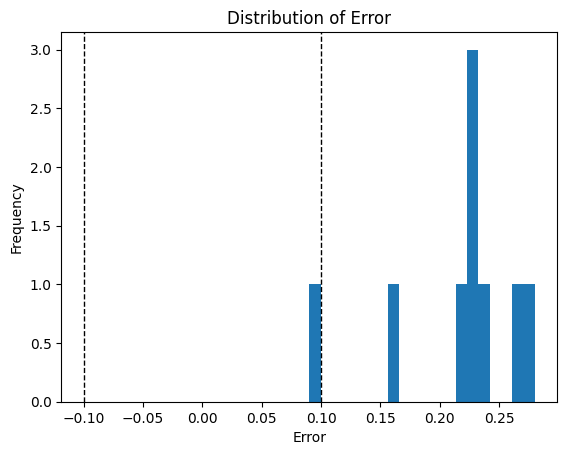

In [63]:
y_pred= predictions
df_test['output']=y_pred
from sklearn.metrics import mean_absolute_error as MAE
output=df_test['output']
variable=df_test['CPI']
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
import matplotlib.pyplot as plt
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(-0.1, color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

In [64]:
df_test.to_excel('report_digital_twin_NN_performance.xlsx')